In [1]:
# === 第 0 部分：安裝與匯入套件（Colab 直接執行即可） ===

import pandas as pd
import numpy as np
import statsmodels.api as sm


In [2]:
# === 第 1 部分：讀取資料 ===
# 方法一：如果檔案已經放在 Colab 的工作目錄（左邊檔案區）：
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Vibe Coding/Data/heart_failure_clinical_records_dataset.csv")

# 如果檔名不同，請改成你實際的檔名，例如：
# df = pd.read_csv("heart_failure.csv")



In [3]:
# === 第 2 部分：快速檢視資料（確認欄位與型態） ===

print("資料前 5 筆：")
display(df.head())

print("\n資料結構：")
print(df.info())


資料前 5 筆：


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1



資料結構：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [4]:
# === 第 3 部分：準備 Logistic Regression 的自變數與因變數 ===

# 以 DEATH_EVENT 為因變數（0/1）
y = df["DEATH_EVENT"]

# 自變數：這裡先簡單用「除了 DEATH_EVENT 以外的所有欄位」
# 若你不想把 time 放進模型，可改成 drop(["DEATH_EVENT", "time"], axis=1)
# X = df.drop(columns=["DEATH_EVENT"])
X = df.drop(["DEATH_EVENT", "time"], axis=1)

# 加入截距項（constant），Logistic Regression 必備
X_const = sm.add_constant(X)

print("自變數欄位：", X_const.columns.tolist())


自變數欄位： ['const', 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']


In [5]:
# === 第 4 部分：建立並估計 Logistic Regression 模型 ===

logit_model = sm.Logit(y, X_const)

# disp=False 可以避免輸出過多訊息
result = logit_model.fit(disp=False)

# 顯示完整的統計摘要（若只想看顯著變數，可以略過這行）
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Tue, 02 Dec 2025   Pseudo R-squ.:                  0.2160
Time:                        12:01:54   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.9643      4.601      1.079      0.281      -4.054      13.982
age                          0.0557      0.013      4.241      0.000       0.030       0.

In [6]:
# === 第 5 部分：整理係數、p-value、勝算比(odds ratio)，並只列出顯著變數 ===

summary_table = pd.DataFrame({
    "coef": result.params,
    "p_value": result.pvalues,
    "odds_ratio": np.exp(result.params)
})

# 依需求可調整顯著水準 alpha（例如 0.05 或 0.01）
alpha = 0.05
significant_vars = summary_table[summary_table["p_value"] < alpha]

# 讓輸出更好看一點：四捨五入到第四位小數
significant_vars_rounded = significant_vars.round(4)

print("顯著變數（p_value < {}）：".format(alpha))
display(significant_vars_rounded)


顯著變數（p_value < 0.05）：


,coef,p_value,odds_ratio
age,0.0557,0.0000,1.0573
creatinine_phosphokinase,0.0003,0.0419,1.0003
ejection_fraction,-0.0703,0.0000,0.9321
serum_creatinine,0.6619,0.0001,1.9384


In [7]:
# === 第 1 部分：繪圖套件 ===
import matplotlib.pyplot as plt
import seaborn as sns

# 讓圖看起來比較舒服一點
sns.set(style="whitegrid")


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20129 (\N{CJK UNIFIED IDEOGRAPH-4EA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


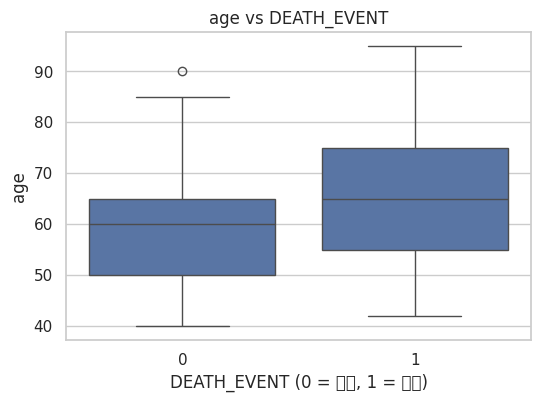

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20129 (\N{CJK UNIFIED IDEOGRAPH-4EA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


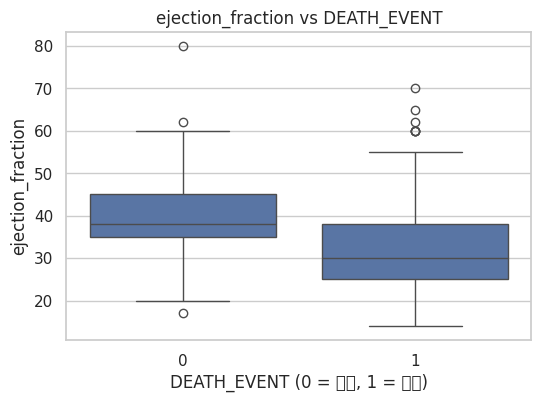

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20129 (\N{CJK UNIFIED IDEOGRAPH-4EA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


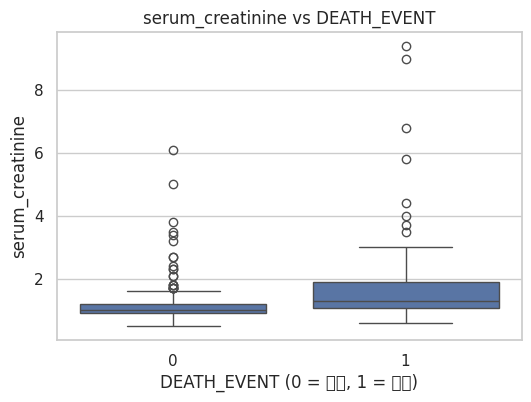

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20129 (\N{CJK UNIFIED IDEOGRAPH-4EA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


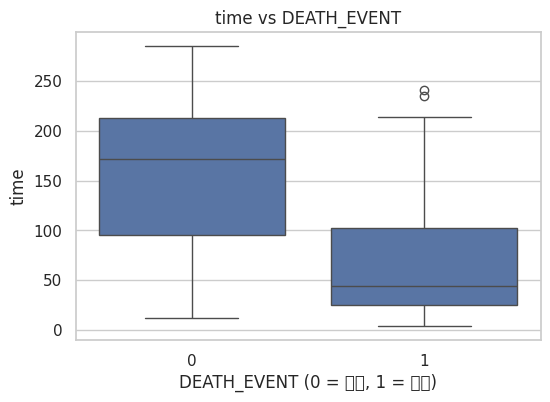

In [8]:
# === 第 2 部分：箱型圖觀察死亡與否在不同變數的分佈 ===

vars_to_plot = ["age", "ejection_fraction", "serum_creatinine", "time"]

for var in vars_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="DEATH_EVENT", y=var, data=df)
    plt.title(f"{var} vs DEATH_EVENT")
    plt.xlabel("DEATH_EVENT (0 = 存活, 1 = 死亡)")
    plt.ylabel(var)
    plt.show()


In [9]:
# === 第 3-1 部分：定義函數，用於畫 logistic 預測機率曲線 ===

def plot_logistic_relationship(var_name, xlabel=None, num_points=100):
    """
    var_name: 要畫哪一個自變數（如 'age'）
    xlabel: x軸標籤（若為 None 則用欄位名稱）
    num_points: x軸上取幾個點來畫平滑曲線
    """
    if xlabel is None:
        xlabel = var_name

    # 1. 建立該變數的範圍（從最小到最大）
    x_min = df[var_name].min()
    x_max = df[var_name].max()
    x_grid = np.linspace(x_min, x_max, num_points)

    # 2. 其他變數固定在平均值
    base_values = X.mean()    # X 是 df.drop("DEATH_EVENT", axis=1)

    # 建立一個 DataFrame：每一列都是 base，但 var_name 不同
    X_plot = pd.DataFrame([base_values.values] * num_points, columns=base_values.index)
    X_plot[var_name] = x_grid

    # 3. 加上常數項
    X_plot_const = sm.add_constant(X_plot, has_constant='add')

    # 4. 用已經估計好的 result 來預測「死亡機率」
    y_pred = result.predict(X_plot_const)

    # 5. 畫圖：原始資料 + logistic 曲線
    plt.figure(figsize=(6,4))

    # (a) 原始資料：用散點圖顯示，每個點的 y 是實際的 DEATH_EVENT（0 或 1）
    #    這樣可以看到大致分佈
    sns.scatterplot(x=df[var_name], y=df["DEATH_EVENT"], alpha=0.3, s=20)

    # (b) Logistic 預測機率曲線
    plt.plot(x_grid, y_pred, linewidth=2)

    plt.xlabel(xlabel)
    plt.ylabel("Predicted probability of DEATH_EVENT")
    plt.title(f"Logistic model: DEATH_EVENT vs {var_name}")
    plt.ylim(-0.05, 1.05)
    plt.show()


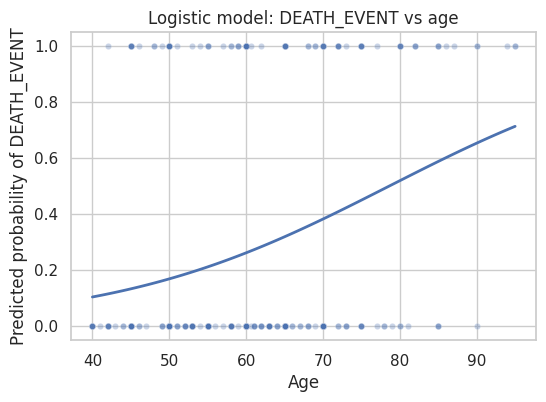

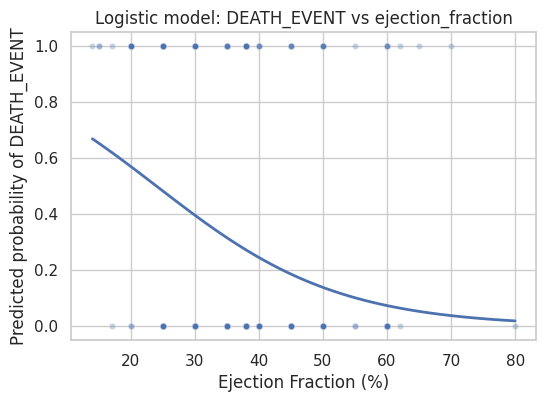

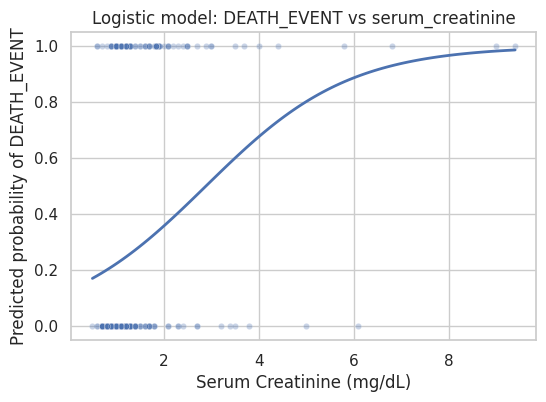

ValueError: shapes (100,13) and (12,) not aligned: 13 (dim 1) != 12 (dim 0)

In [10]:
# === 第 3-2 部分：對每個顯著變數畫 logistic 預測機率曲線 ===

plot_logistic_relationship("age", xlabel="Age")
plot_logistic_relationship("ejection_fraction", xlabel="Ejection Fraction (%)")
plot_logistic_relationship("serum_creatinine", xlabel="Serum Creatinine (mg/dL)")
plot_logistic_relationship("time", xlabel="Follow-up Time (days)")


In [ ]:
# === 選擇只用 ejection_fraction 建一個簡單 logistic 模型 ===
X_ef = sm.add_constant(df[["ejection_fraction"]])
model_ef = sm.Logit(y, X_ef).fit(disp=False)

# 畫出單變數 logistic 曲線
x_min = df["ejection_fraction"].min()
x_max = df["ejection_fraction"].max()
x_grid = np.linspace(x_min, x_max, 100)

X_grid_ef = sm.add_constant(pd.DataFrame({"ejection_fraction": x_grid}))
y_pred_ef = model_ef.predict(X_grid_ef)

plt.figure(figsize=(6,4))
sns.scatterplot(x=df["ejection_fraction"], y=df["DEATH_EVENT"], alpha=0.3, s=20)
plt.plot(x_grid, y_pred_ef)
plt.xlabel("Ejection Fraction (%)")
plt.ylabel("Predicted probability of DEATH_EVENT")
plt.title("Single-variable Logistic: DEATH_EVENT vs EF")
plt.ylim(-0.05, 1.05)
plt.show()
